In [21]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

In [22]:
# read csv files

df=[]
df.append(pd.read_csv('cluster_blobs.csv'))
df.append(pd.read_csv('cluster_circles.csv'))
df.append(pd.read_csv('cluster_moons.csv'))


C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


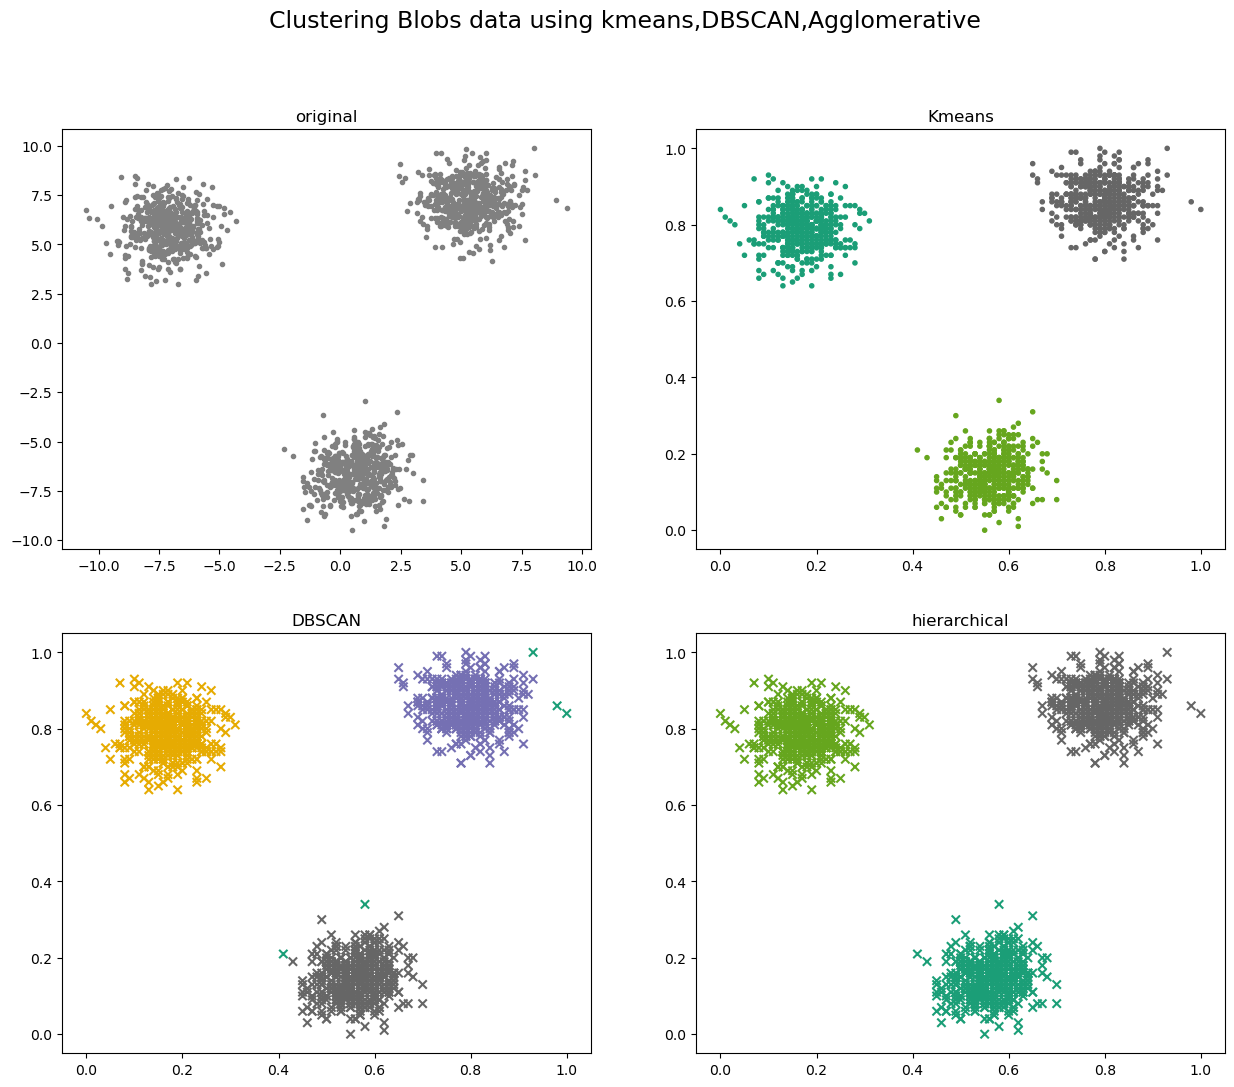

,Kmeans,DBSCAN,hierarchical
blobs,0.861637,0.817111,0.861637
circles,,,
moons,,,


In [24]:
# Created 4 axis of a figure one for each
#
#     first figure will contain original data set without any clusters
#     second figure will contain original data set with kmeans clusters
#     third figure will contain original data set with DBSCAn clusters
#     fourth figure will contain original data set with Agglomerative clusters

# # Blobs data
#
#

# epsilon value for DBSCAN taken as 0.05 since scaled data contains all point from 0 to 1



fig,ax=plt.subplots(2,2,figsize=(15,12))
fig.suptitle('Clustering Blobs data using kmeans,DBSCAN,Agglomerative',fontsize=17)
ax[0][0].scatter(df[0]['X1'],df[0]['X2'],marker='.',color='gray')
ax[0][0].set_title('original')
kmeans=KMeans(3)
dbscan=DBSCAN(eps=0.05)
scaler=MinMaxScaler()
scaled=pd.DataFrame(scaler.fit_transform(df[0]).round(2))
kmeans_clusters=kmeans.fit(scaled).labels_
dbscan_clusters=dbscan.fit(scaled).labels_
ac_clusters=AC(n_clusters=3,linkage='single').fit(scaled).labels_
scaled['kmeans']=kmeans_clusters
scaled['dbscan']=dbscan_clusters
scaled['hierarchical']=ac_clusters
ax[0][1].scatter(scaled[0],scaled[1],
                 c=scaled['kmeans'],cmap='Dark2',marker='.')
ax[0][1].set_title('Kmeans')
ax[1][0].scatter(scaled[0],scaled[1],
                 c=scaled['dbscan'],cmap='Dark2',marker='x')
ax[1][0].set_title('DBSCAN')
ax[1][1].scatter(scaled[0],scaled[1],
                 c=scaled['hierarchical'],cmap='Dark2',marker='x')
ax[1][1].set_title('hierarchical')
plt.show()
s_score=pd.DataFrame(index=['blobs','circles','moons'],
                     columns=['Kmeans','DBSCAN','hierarchical'])
s_score.iloc[0,0]=silhouette_score(scaled[scaled.columns[0:2]],kmeans_clusters)
s_score.iloc[0,1]=silhouette_score(scaled[scaled.columns[0:2]],dbscan_clusters)
s_score.iloc[0,2]=silhouette_score(scaled[scaled.columns[0:2]],ac_clusters)
s_score.fillna(' ')

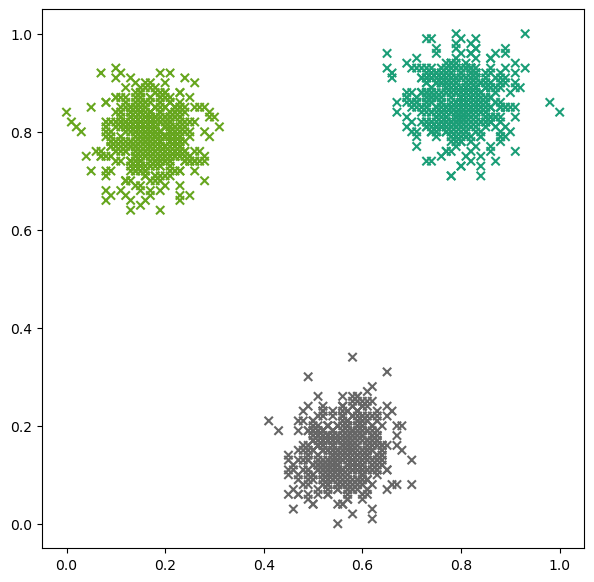

           Kmeans    DBSCAN hierarchical
blobs    0.861637  0.861637     0.861637
circles                                 
moons                                   


In [25]:

dbscan=DBSCAN(eps=0.15)
plt.figure(figsize=(7,7))
dbscan_clusters=dbscan.fit(scaled.iloc[:,[0,1]]).labels_
s_score.iloc[0,0]=silhouette_score(scaled[scaled.columns[0:2]],kmeans_clusters)
s_score.iloc[0,1]=silhouette_score(scaled[scaled.columns[0:2]],dbscan_clusters)
s_score.iloc[0,2]=silhouette_score(scaled[scaled.columns[0:2]],ac_clusters)
scaled['dbscan']=dbscan_clusters
plt.scatter(scaled[0],scaled[1],
            c=scaled['dbscan'],cmap='Dark2',marker='x')
plt.show()
print(s_score.fillna(' '))

C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


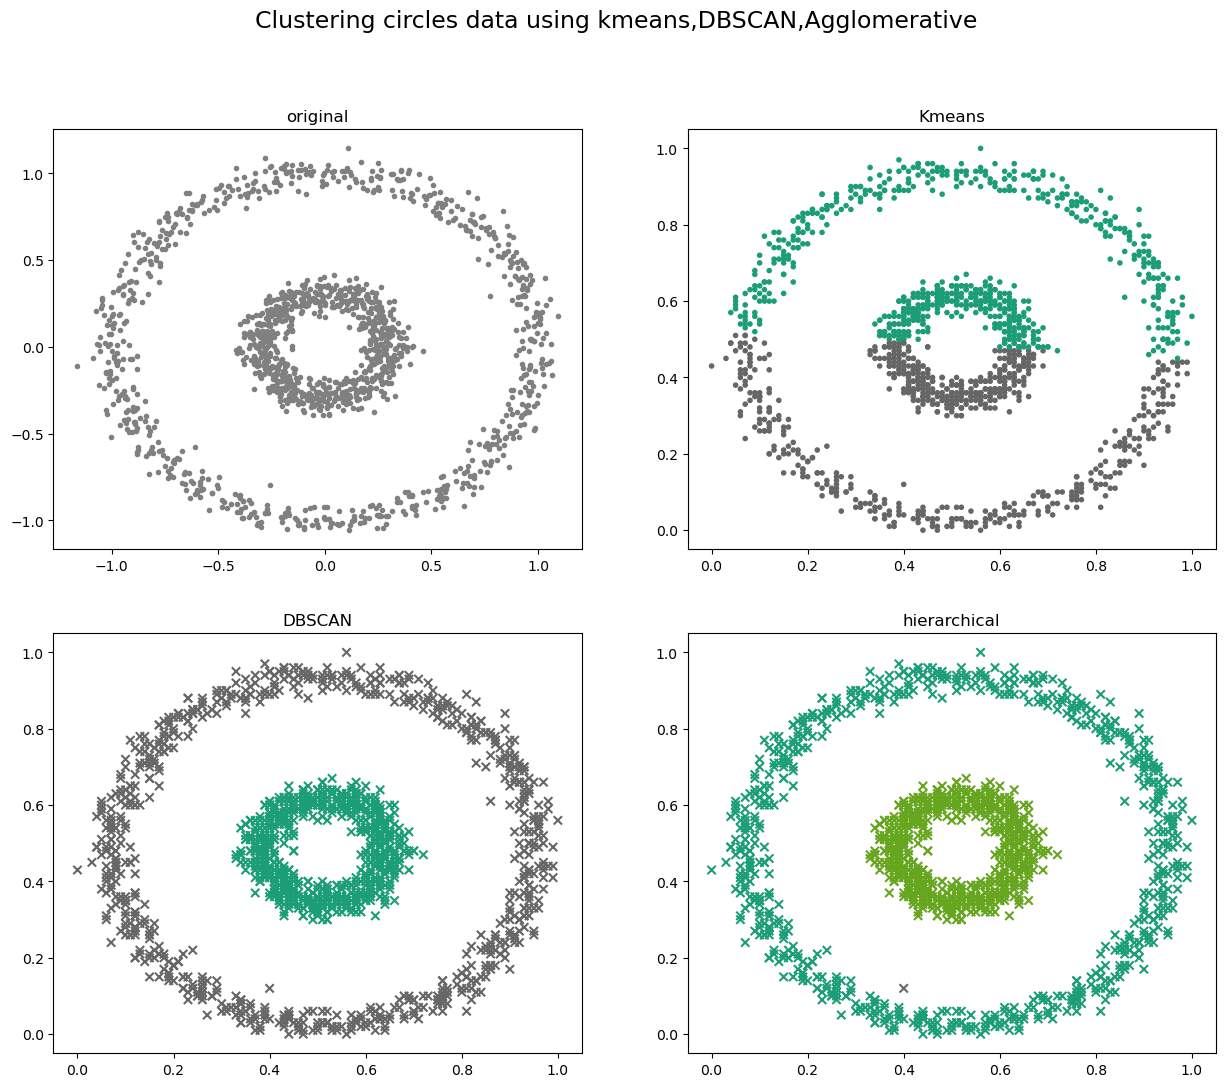

In [26]:
fig,ax=plt.subplots(2,2,figsize=(15,12))
fig.suptitle('Clustering circles data using kmeans,DBSCAN,Agglomerative',
             fontsize=17)
ax[0][0].scatter(df[1]['X1'],df[1]['X2'],marker='.',
                 color='gray')
ax[0][0].set_title('original')
kmeans=KMeans(2)
dbscan=DBSCAN(eps=0.15)
scaler=MinMaxScaler()
scaled=pd.DataFrame(scaler.fit_transform(df[1]).round(2))
kmeans_clusters=kmeans.fit(scaled).labels_
dbscan_clusters=dbscan.fit(scaled).labels_
ac_clusters=AC(n_clusters=3,linkage='single').fit(scaled).labels_
scaled['kmeans']=kmeans_clusters
scaled['dbscan']=dbscan_clusters
scaled['hierarchical']=ac_clusters
ax[0][1].scatter(scaled[0],scaled[1],
                 c=scaled['kmeans'],cmap='Dark2',marker='.')
ax[0][1].set_title('Kmeans')
ax[1][0].scatter(scaled[0],scaled[1],
                 c=scaled['dbscan'],cmap='Dark2',marker='x')
ax[1][0].set_title('DBSCAN')
ax[1][1].scatter(scaled[0],scaled[1],
                 c=scaled['hierarchical'],cmap='Dark2',marker='x')
ax[1][1].set_title('hierarchical')
plt.show()

In [27]:
s_score.iloc[1,0]=silhouette_score(scaled[scaled.columns[0:2]],kmeans_clusters)
s_score.iloc[1,1]=silhouette_score(scaled[scaled.columns[0:2]],dbscan_clusters)
s_score.iloc[1,2]=silhouette_score(scaled[scaled.columns[0:2]],ac_clusters)
print(s_score.fillna(' '))
#     -For circles it may seem kmeans has better silhouette score but DBSCAN done better job cuz its dense base cluster
#     -hierarchical shown very low value because of outliers

           Kmeans    DBSCAN hierarchical
blobs    0.861637  0.861637     0.861637
circles  0.297961  0.208108     0.084802
moons                                   


C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


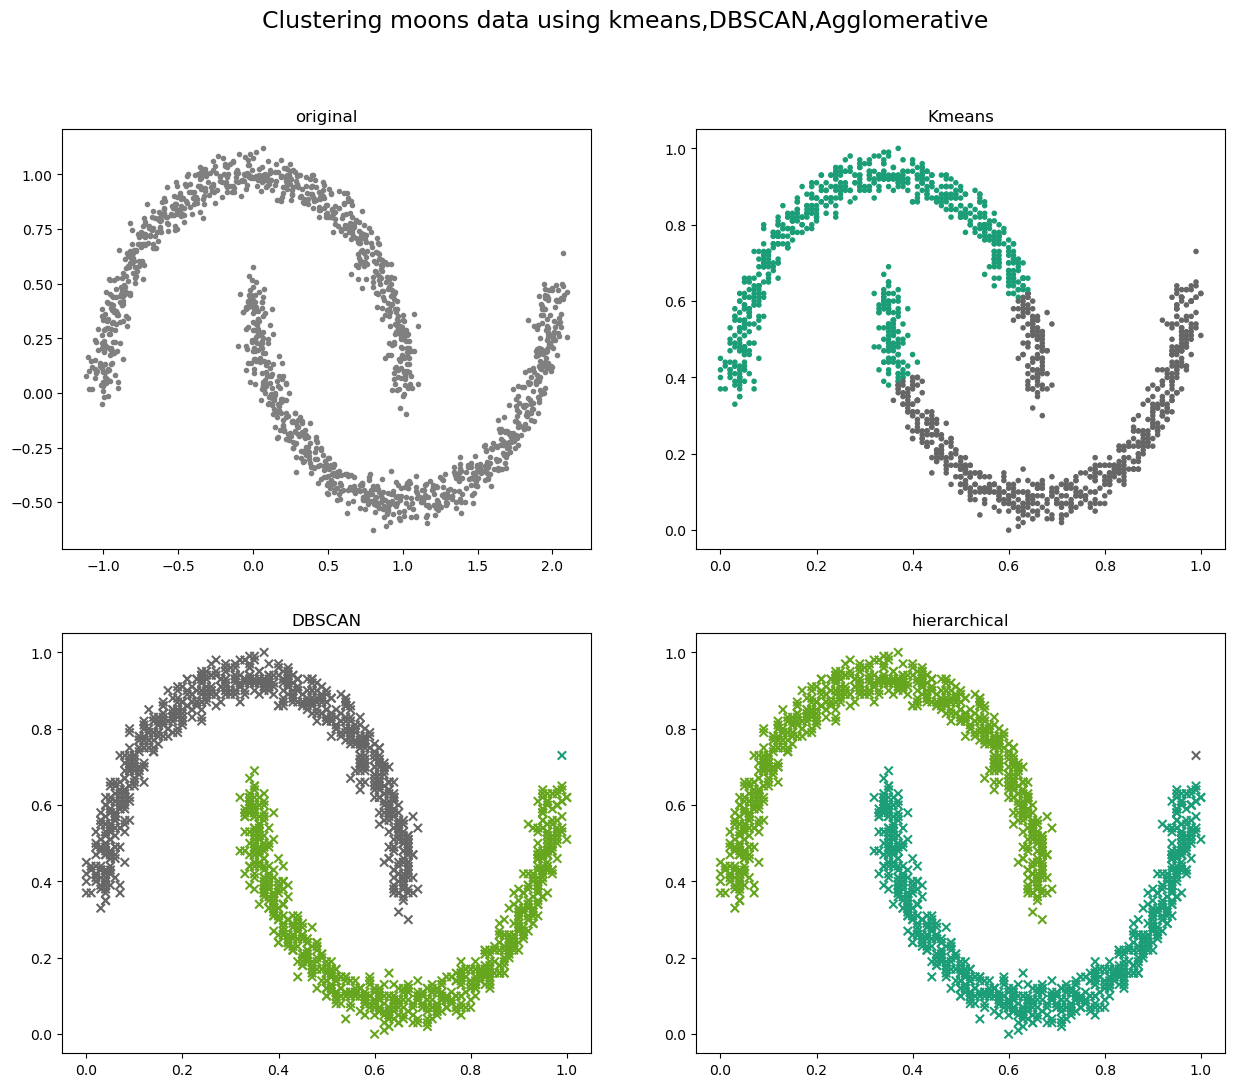

In [28]:
fig,ax=plt.subplots(2,2,figsize=(15,12))
fig.suptitle('Clustering moons data using kmeans,DBSCAN,Agglomerative',fontsize=17)
ax[0][0].scatter(df[2]['X_1'],df[2]['X_2'],marker='.',color='gray')
ax[0][0].set_title('original')
kmeans=KMeans(2)
dbscan=DBSCAN(eps=0.05)
scaler=MinMaxScaler()
scaled=pd.DataFrame(scaler.fit_transform(df[2]).round(2))
kmeans_clusters=kmeans.fit(scaled).labels_
dbscan_clusters=dbscan.fit(scaled).labels_
ac_clusters=AC(n_clusters=3,linkage='single').fit(scaled).labels_
scaled['kmeans']=kmeans_clusters
scaled['dbscan']=dbscan_clusters
scaled['hierarchical']=ac_clusters
ax[0][1].scatter(scaled[0],scaled[1],
                 c=scaled['kmeans'],cmap='Dark2',marker='.')
ax[0][1].set_title('Kmeans')
ax[1][0].scatter(scaled[0],scaled[1],
                 c=scaled['dbscan'],cmap='Dark2',marker='x')
ax[1][0].set_title('DBSCAN')
ax[1][1].scatter(scaled[0],scaled[1],
                 c=scaled['hierarchical'],cmap='Dark2',marker='x')
ax[1][1].set_title('hierarchical')
plt.show()

In [29]:
s_score.iloc[2,0]=silhouette_score(scaled[scaled.columns[0:2]],kmeans_clusters)
s_score.iloc[2,1]=silhouette_score(scaled[scaled.columns[0:2]],dbscan_clusters)
s_score.iloc[2,2]=silhouette_score(scaled[scaled.columns[0:2]],ac_clusters)
print(s_score.fillna(' '))

#     -For Moons it may seem kmeans has better silhouette score but DBSCAN done better job cuz its dense base cluster
#     -hierarchical shown very low value because of outliers
#

# # Final Report
#     -> Incase of very seperated cluster data without any shapes all done better job of classifying clusters
#     -> When it comes to density based clusters DBSCAN and AgglomerativeClustering(single link) done better job
#     -> since silhouette score validates more on average basis it may show kmeans as better overall but in reality DBSCAN and AgglomerativeClustering(single link) both are better for


           Kmeans    DBSCAN  hierarchical
blobs    0.861637  0.861637      0.861637
circles  0.297961  0.208108      0.084802
moons    0.500170  0.280880      0.280880


In [11]:
dbscan = DBSCAN(eps=0.05, min_samples =3)

In [12]:
lables = dbscan.fit_predict(df)

In [13]:
np.unique(lables)

array([-1,  0,  1], dtype=int64)

In [14]:
#scaling data
scaling=StandardScaler()
scaled=scaling.fit_transform(df)

In [15]:
scaled_df=pd.DataFrame(scaled)

# princt scaled dataset
scaled_df.head()


,0,1
0,0.202660,-1.403402
1,1.208425,-0.990606
2,1.271576,-0.972461
3,-0.557684,0.399052
4,1.158119,-1.291631


In [16]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 2,random_state = 1)
kmeans.fit(scaled_df)

C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

In [17]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)



C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DEEPAK KORI\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [18]:
#labelings
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
# kmeans_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


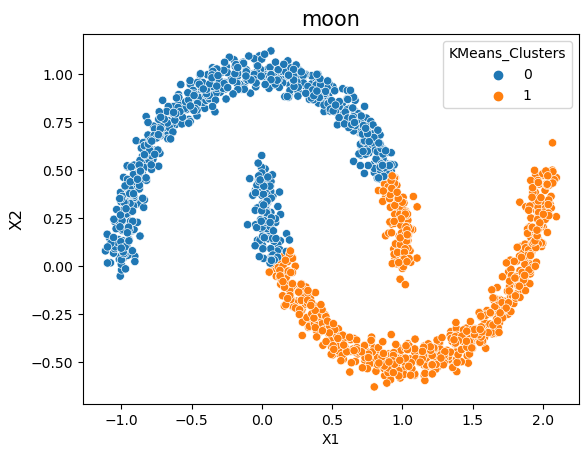

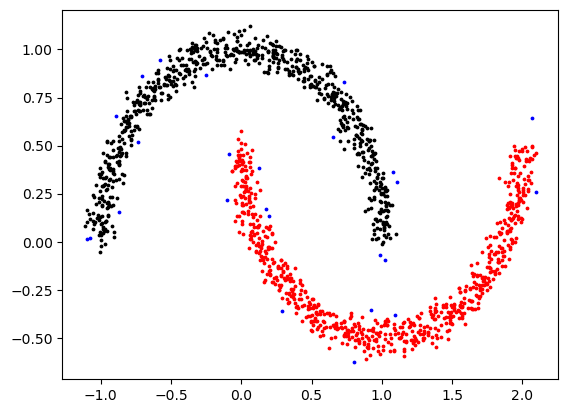

In [19]:
#visulization of clusters in Kmeans
sns.scatterplot(kmeans_df[0],kmeans_df[1],data=kmeans_df, hue='KMeans_Clusters') 
plt.title("moon", fontsize=15)
plt.xlabel("X1", fontsize=10)
plt.ylabel("X2", fontsize=12)
plt.show()

plt.scatter(df[lables==-1,0],df[lables ==-1,1],s=3 ,c ="blue")
plt.scatter(df[lables==0,0],df[lables ==0,1],s=3 ,c ="red")
plt.scatter(df[lables==1,0],df[lables ==1,1],s=3 ,c ="black")

plt.show()

In [20]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3
print(metrics.silhouette_score(df, dbscan.labels_))
print(metrics.silhouette_score(df, kmeans.labels_))


0.20625909050875635
0.4714635870038305
